# Work with categorical Data

Machine Learning algorithms require that input data must be in numerical format. Only then the algorithms work successfully on them. So, the text data must be converted into numbers before they are fed into an algorithm.

as we said before Categorical data can be **Ordinal** or **Nominal**


### Ordinal variable
can be understood as categorical values that can be sorted or ordered. For example, T-shirt size would be an ordinal feature, because we can define an order XL > L > M.


### Nominal variable
nominal features don't imply any order and, to continue with the previous example, we could think of T-shirt color as a nominal feature since it typically doesn't make sense to say that, for example, red is larger than blue.




## Table of Contents
1. Work with Ordinal Features with pandas `map` method.
2. Work with Nominal Features with pandas `get_dummies` method.

In [18]:
# Importing Liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc = {"figure.figsize" : [10 , 10 ]} ,font_scale=1.5)
sns.set_palette("viridis")


In [2]:
# Loading dataset
df = pd.read_csv("t-shirts.csv")
df

,Date ordered,Order number,Brand,Size,Color,Design,Price,Delivery status
0,2016-05-05,SDH-YU0,Yolo,L,red,spiral,14.47,damaged
1,2016-05-06,SDH-YU1,Yolo,XXL,green,spiral,16.24,delayed
2,2016-05-07,SDH-YU2,BLOT,XL,black,Stripes,14.32,delivered
3,2016-05-08,SDH-YU3,Kent,XXL,green,plain,14.07,damaged
4,2016-05-09,SDH-YU4,BUCK,XL,white,spiral,15.56,order received
...,...,...,...,...,...,...,...,...
495,2017-09-12,SDH-YU495,Wang,XS,green,diamond,15.03,damaged
496,2017-09-13,SDH-YU496,BUCK,M,black,Stripes,14.49,shipping
497,2017-09-14,SDH-YU497,Kent,XXL,purple,plain,15.61,shipping
498,2017-09-15,SDH-YU498,Yolo,S,red,plain,13.49,order received


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Date ordered       500 non-null object
Order number       500 non-null object
Brand              500 non-null object
Size               500 non-null object
Color              500 non-null object
Design             500 non-null object
Price              500 non-null float64
Delivery status    500 non-null object
dtypes: float64(1), object(7)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Price
count,500.000000
mean,15.016840
std,1.016292
min,12.240000
25%,14.307500
50%,14.990000
75%,15.622500
max,18.030000


In [5]:
for col in df.columns:
    print(f"The col :: {col}\n\nThe {col}_col  unique_Values :: {df[col].unique()}\n\
The col_{col} Value_counts :: \n{df[col].value_counts()}\n\n-----------------\n")

The col :: Date ordered

The Date ordered_col  unique_Values :: ['2016-05-05' '2016-05-06' '2016-05-07' '2016-05-08' '2016-05-09'
 '2016-05-10' '2016-05-11' '2016-05-12' '2016-05-13' '2016-05-14'
 '2016-05-15' '2016-05-16' '2016-05-17' '2016-05-18' '2016-05-19'
 '2016-05-20' '2016-05-21' '2016-05-22' '2016-05-23' '2016-05-24'
 '2016-05-25' '2016-05-26' '2016-05-27' '2016-05-28' '2016-05-29'
 '2016-05-30' '2016-05-31' '2016-06-01' '2016-06-02' '2016-06-03'
 '2016-06-04' '2016-06-05' '2016-06-06' '2016-06-07' '2016-06-08'
 '2016-06-09' '2016-06-10' '2016-06-11' '2016-06-12' '2016-06-13'
 '2016-06-14' '2016-06-15' '2016-06-16' '2016-06-17' '2016-06-18'
 '2016-06-19' '2016-06-20' '2016-06-21' '2016-06-22' '2016-06-23'
 '2016-06-24' '2016-06-25' '2016-06-26' '2016-06-27' '2016-06-28'
 '2016-06-29' '2016-06-30' '2016-07-01' '2016-07-02' '2016-07-03'
 '2016-07-04' '2016-07-05' '2016-07-06' '2016-07-07' '2016-07-08'
 '2016-07-09' '2016-07-10' '2016-07-11' '2016-07-12' '2016-07-13'
 '2016-07-14

* Fro the result above we can see some Observations ::
     * Price_col :: Its our Target Which is Numerical_data
     * Date_col  :: Its define as object dtype on that case we will convert its type into Datetime type
     * There are Ordinal_Categorical_data like ("Size")
     * There are Norminal_Categorical_data like("Brand" , "Desigin" , "Color" , "Order_Number")

In [6]:
df.columns

Index(['Date ordered', 'Order number', 'Brand', 'Size', 'Color', 'Design',
       'Price', 'Delivery status'],
      dtype='object')

In [7]:
# Convert Dtype of Date from Object into Datetime ::
df["Date ordered"] = pd.to_datetime(df["Date ordered"])
# Inverstigate_that_converting_Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Date ordered       500 non-null datetime64[ns]
Order number       500 non-null object
Brand              500 non-null object
Size               500 non-null object
Color              500 non-null object
Design             500 non-null object
Price              500 non-null float64
Delivery status    500 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 31.4+ KB


In [8]:
# Appling Feature_Enginnering_Technices::
df["Years"]  = df["Date ordered"].dt.year
df["Months"] =df["Date ordered"].dt.month
df["Weeks"] = df["Date ordered"].dt.week

In [9]:
df[["Years" , "Months" , "Weeks"]]

,Years,Months,Weeks
0,2016,5,18
1,2016,5,18
2,2016,5,18
3,2016,5,18
4,2016,5,19
...,...,...,...
495,2017,9,37
496,2017,9,37
497,2017,9,37
498,2017,9,37


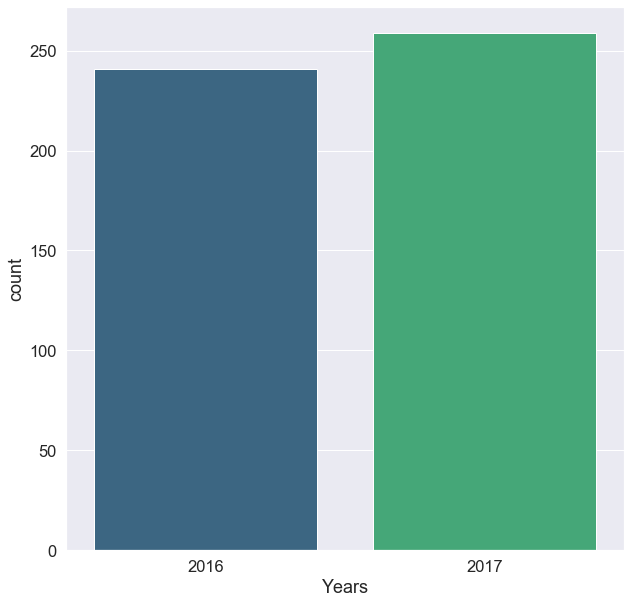

In [19]:
sns.countplot( x= "Years" , data =df , palette="viridis")

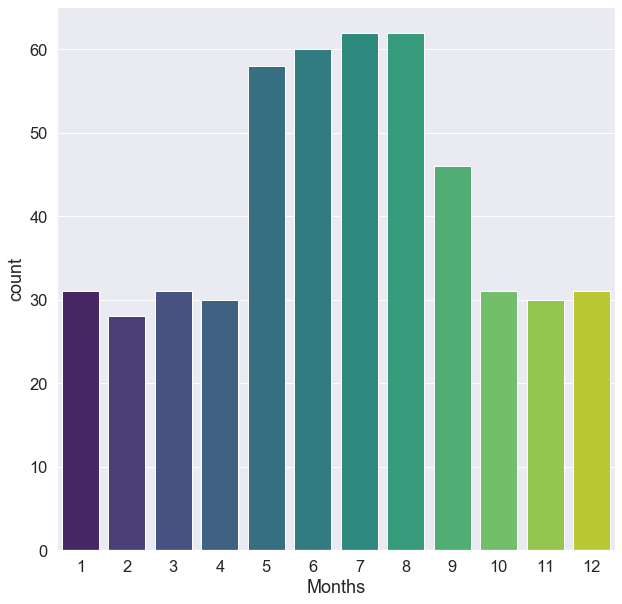

In [20]:
sns.countplot( x= "Months" , data =df , palette="viridis")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

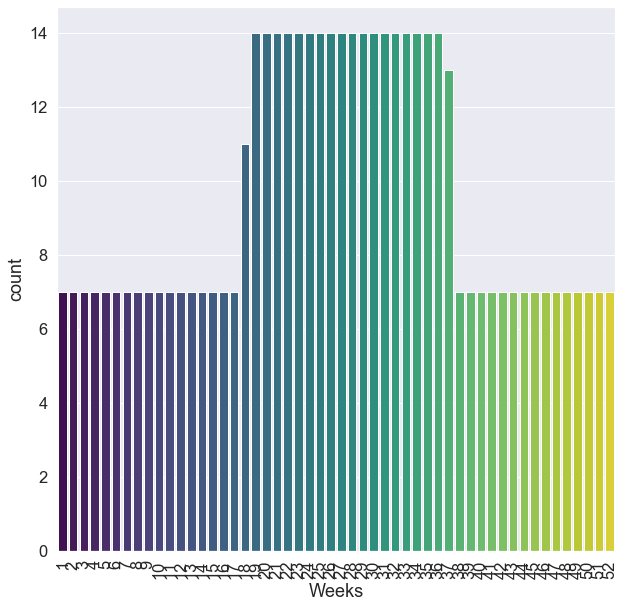

In [21]:
sns.countplot( x= "Weeks" , data =df , palette="viridis" ) 
plt.xticks(rotation = 90)

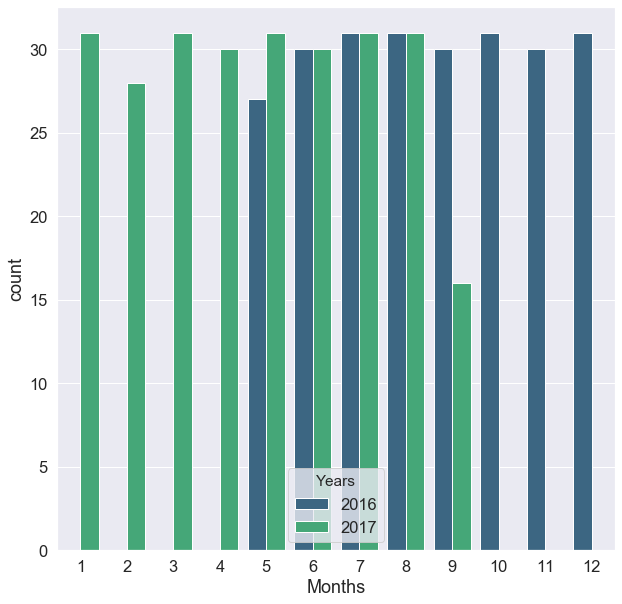

In [22]:
sns.countplot( x= "Months" , data =df , hue="Years",  palette="viridis")

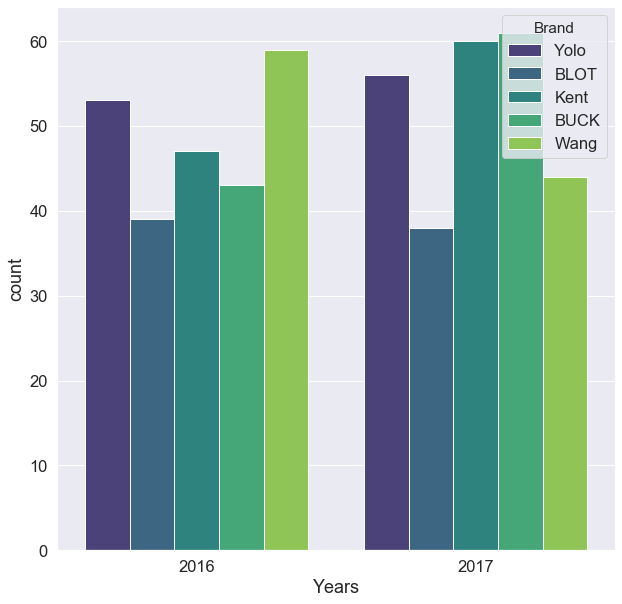

In [23]:
sns.countplot( x= "Years" , data =df , hue="Brand",  palette="viridis")

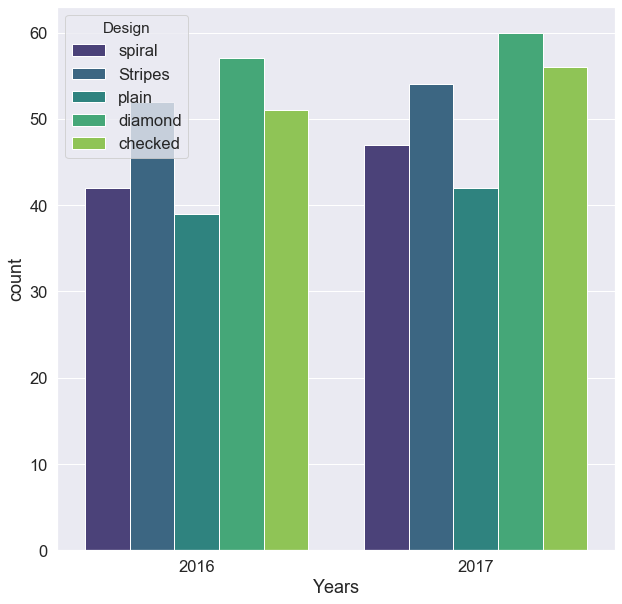

In [24]:
sns.countplot( x= "Years" , data =df , hue="Design",  palette="viridis")

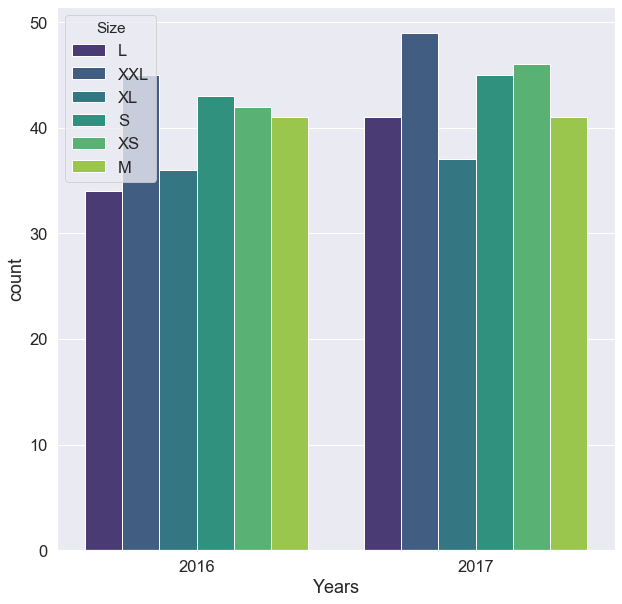

In [25]:
sns.countplot( x= "Years" , data =df , hue="Size",  palette="viridis")

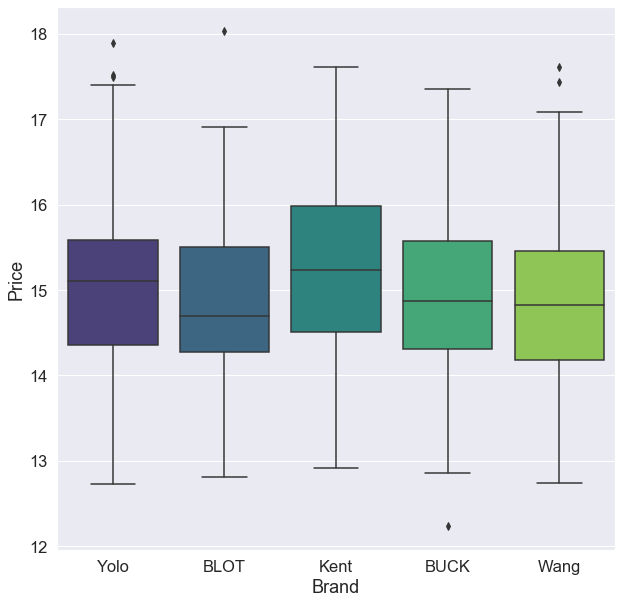

In [26]:
sns.boxplot( x = "Brand" , y = "Price" , data = df , palette="viridis")

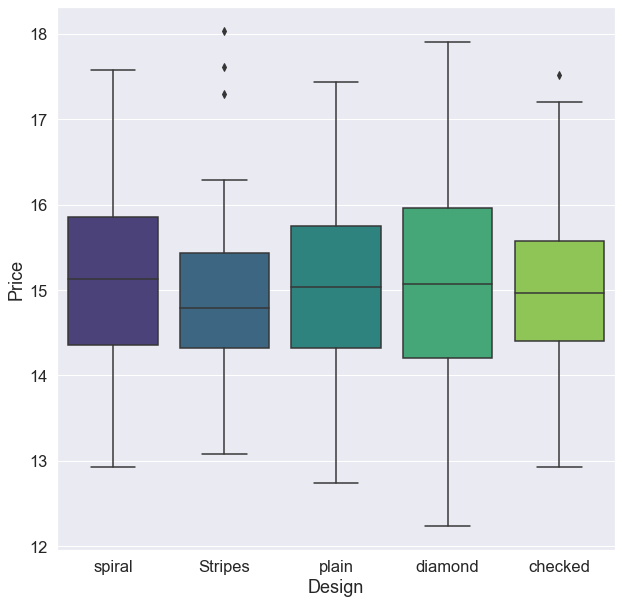

In [27]:
sns.boxplot( x = "Design" , y = "Price" , data = df , palette="viridis")

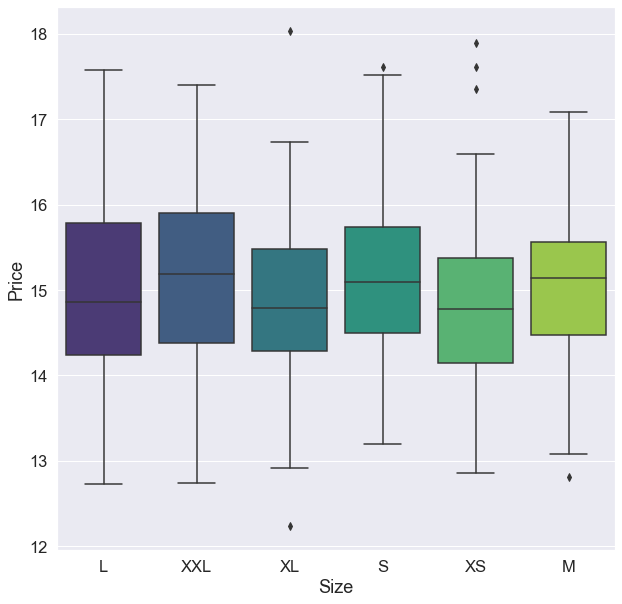

In [28]:
sns.boxplot( x = "Size" , y = "Price" , data = df , palette="viridis")

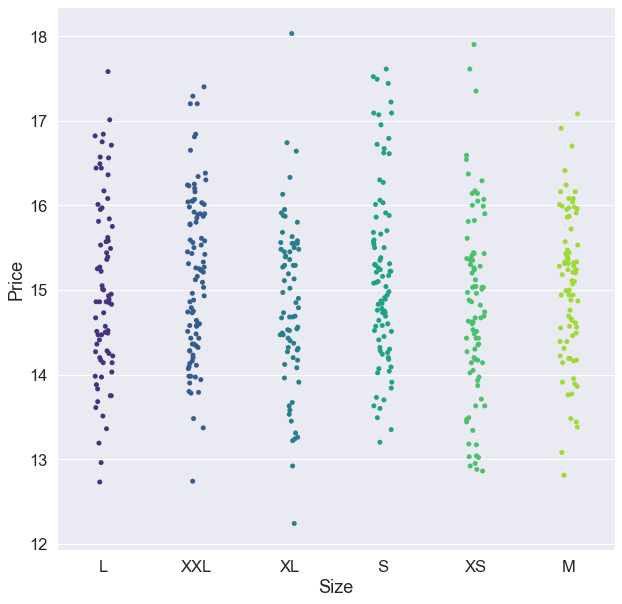

In [29]:
sns.stripplot( x = "Size" , y = "Price" , data = df , palette="viridis")

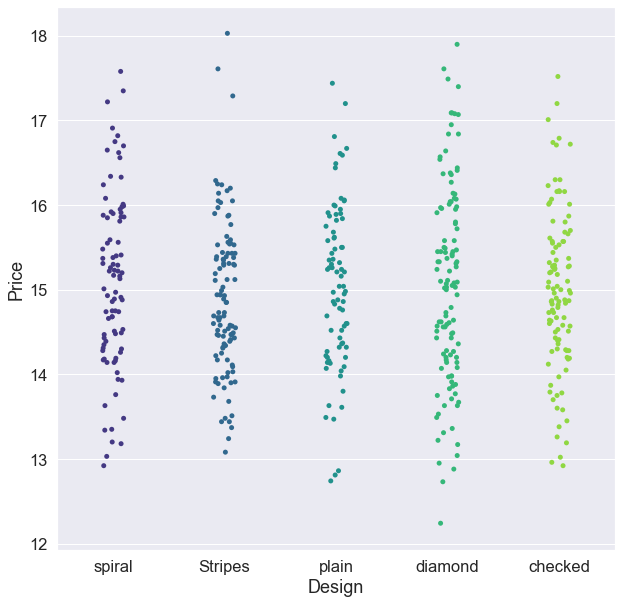

In [30]:
sns.stripplot( x = "Design" , y = "Price" , data = df , palette="viridis")

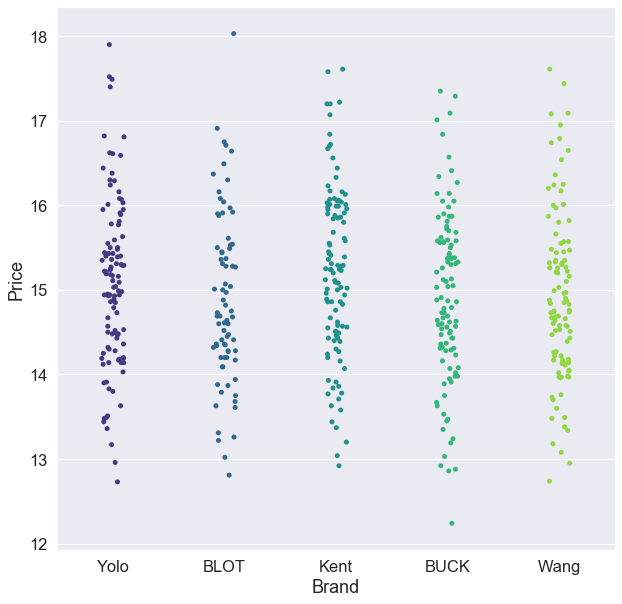

In [31]:
sns.stripplot( x = "Brand" , y = "Price" , data = df , palette="viridis")

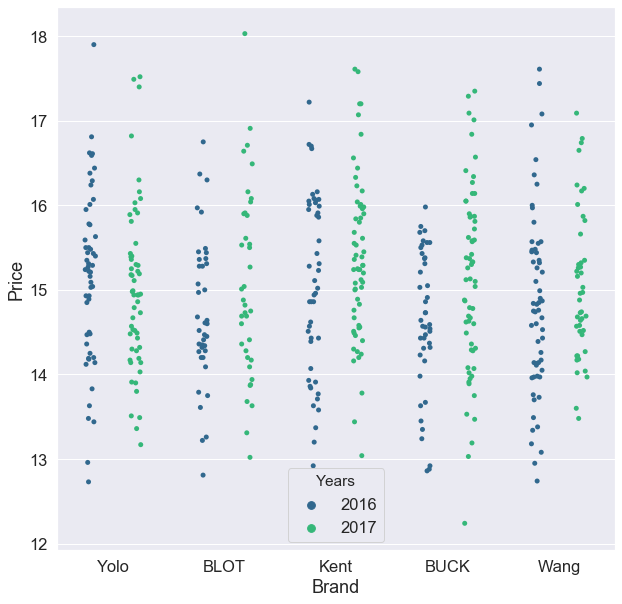

In [32]:
sns.stripplot( x = "Brand" , y = "Price" , data = df , hue="Years" , dodge=True, palette="viridis")

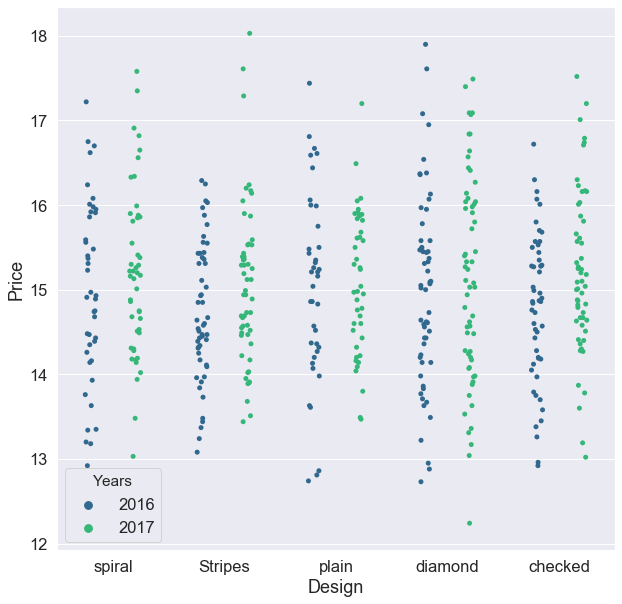

In [33]:
sns.stripplot( x = "Design" , y = "Price" , data = df , hue="Years" , dodge=True, palette="viridis")

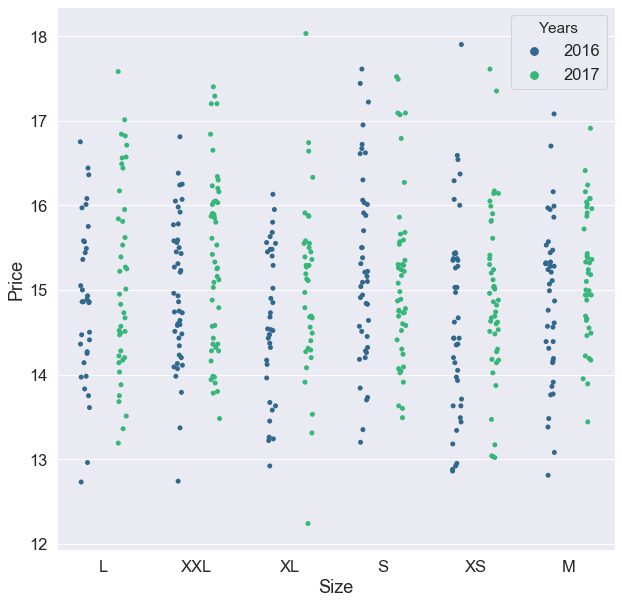

In [34]:
sns.stripplot( x = "Size" , y = "Price" , data = df , hue="Years" , dodge=True, palette="viridis")

## 1) Work with Ordinal Features with pandas `map` method.

Ordinal features are those with some order associated with them. We can tell from the sample of ordinal features below these features have an order that may be important.

For example we have Size column contains ordinal data so that XS < S < M < L < XL < XXL 

In [35]:
# Encoding Oridenal_catecorical_columns Using One_Hot_Encoding ::
L1 = ["XS" ,"S" , "M" ,  "L" , "XL" , "XXL"]
L2 = [1 , 2 , 3 , 4 , 5 , 5]
Size_map = dict(zip(L1 , L2))
Size_map

{'XS': 1, 'S': 2, 'M': 3, 'L': 4, 'XL': 5, 'XXL': 5}

In [36]:
df["Size"] = df["Size"].map(Size_map)
df[["Size"]]

,Size
0,4
1,5
2,5
3,5
4,5
...,...
495,1
496,3
497,5
498,2


In [37]:
# Other Method To Encode Ordinal_Categorical_data
#inv_size_mapping = {v: k for k, v in size_dict.items()}
#inv_size_mapping

## 2) Work with Nominal Features with pandas `get_dummies` method.

<img src='https://miro.medium.com/max/1400/1*hZLqbZqqrwiqkGxxl2vYkg.png'>

Nominal features are categorical features that have no numerical importance. Order does not matter.

One-hot encoding is a better technique when order doesn’t matter. For example, in the feature Color or Brand there is no obvious order here. One value is not better than another.

In a situation like this, where order doesn’t matter, integer encoding could lead to poor model performance and should not be used.

In one hot encoding, a new binary (dummy) variable is created for each unique value in the categorical variable. For example In the chart above, we had three unique colors and so we create three new features, one for each color. If the value is true, the integer 1 is placed in the field, if false then a 0.

In [38]:
# Encoding Norminal_Categorical_data :: Using dummy_Variable_Encoding
# Not Apply One_hot_Encoding May_Couse_Problems
df = pd.get_dummies(df , columns=['Design', 'Color', 'Brand', 'Delivery status'] ,drop_first=True)
df

,Date ordered,Order number,Size,Price,Years,Months,Weeks,Design_checked,Design_diamond,Design_plain,...,Color_red,Color_white,Brand_BUCK,Brand_Kent,Brand_Wang,Brand_Yolo,Delivery status_delayed,Delivery status_delivered,Delivery status_order received,Delivery status_shipping
0,2016-05-05,SDH-YU0,4,14.47,2016,5,18,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2016-05-06,SDH-YU1,5,16.24,2016,5,18,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,2016-05-07,SDH-YU2,5,14.32,2016,5,18,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2016-05-08,SDH-YU3,5,14.07,2016,5,18,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,2016-05-09,SDH-YU4,5,15.56,2016,5,19,0,0,0,...,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2017-09-12,SDH-YU495,1,15.03,2017,9,37,0,1,0,...,0,0,0,0,1,0,0,0,0,0
496,2017-09-13,SDH-YU496,3,14.49,2017,9,37,0,0,0,...,0,0,1,0,0,0,0,0,0,1
497,2017-09-14,SDH-YU497,5,15.61,2017,9,37,0,0,1,...,0,0,0,1,0,0,0,0,0,1
498,2017-09-15,SDH-YU498,2,13.49,2017,9,37,0,0,1,...,1,0,0,0,0,1,0,0,1,0


In [39]:
# One_hot_Encoding_Method
#df = pd.get_dummies(df , columns=['Design', 'Color', 'Brand', 'Delivery status'] )
#df

# Investigating data After_Handling

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
Date ordered                      500 non-null datetime64[ns]
Order number                      500 non-null object
Size                              500 non-null int64
Price                             500 non-null float64
Years                             500 non-null int64
Months                            500 non-null int64
Weeks                             500 non-null int64
Design_checked                    500 non-null uint8
Design_diamond                    500 non-null uint8
Design_plain                      500 non-null uint8
Design_spiral                     500 non-null uint8
Color_green                       500 non-null uint8
Color_indigo                      500 non-null uint8
Color_purple                      500 non-null uint8
Color_red                         500 non-null uint8
Color_white                       500 non-null uint8
Brand_BUCK                        5

In [41]:
for col in df.columns:
    print(f"The col :: {col}\n\nThe {col}_col  unique_Values :: {df[col].unique()}\n\
The col_{col} Value_counts :: \n{df[col].value_counts()}\n\n-----------------\n")

The col :: Date ordered

The Date ordered_col  unique_Values :: ['2016-05-05T00:00:00.000000000' '2016-05-06T00:00:00.000000000'
 '2016-05-07T00:00:00.000000000' '2016-05-08T00:00:00.000000000'
 '2016-05-09T00:00:00.000000000' '2016-05-10T00:00:00.000000000'
 '2016-05-11T00:00:00.000000000' '2016-05-12T00:00:00.000000000'
 '2016-05-13T00:00:00.000000000' '2016-05-14T00:00:00.000000000'
 '2016-05-15T00:00:00.000000000' '2016-05-16T00:00:00.000000000'
 '2016-05-17T00:00:00.000000000' '2016-05-18T00:00:00.000000000'
 '2016-05-19T00:00:00.000000000' '2016-05-20T00:00:00.000000000'
 '2016-05-21T00:00:00.000000000' '2016-05-22T00:00:00.000000000'
 '2016-05-23T00:00:00.000000000' '2016-05-24T00:00:00.000000000'
 '2016-05-25T00:00:00.000000000' '2016-05-26T00:00:00.000000000'
 '2016-05-27T00:00:00.000000000' '2016-05-28T00:00:00.000000000'
 '2016-05-29T00:00:00.000000000' '2016-05-30T00:00:00.000000000'
 '2016-05-31T00:00:00.000000000' '2016-06-01T00:00:00.000000000'
 '2016-06-02T00:00:00.0000

we use `drop_first`  to get k-1 features, due to the last feature will be redundant and correlated with other features so it can cause problems.
* Spiral dummy variable has been removed from Design column
* Black dummy variable has been removed from Color column
* Blot dummy variable has been removed from Brand column

**note**<br>
you can use `OneHotEncoder` from sklearn to generate the dummy variables from categorical features.